In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as npb

In [ ]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
class_counts = df['class'].value_counts().sort_index()
class_relative = class_counts / class_counts.sum() * 100
class_cumulative = class_counts.cumsum()

freq_table = pd.DataFrame({
    'Absolute Frequency': class_counts,
    'Relative Frequency (%)': class_relative.round(2),
    'Cumulative Frequency': class_cumulative
})

print("\nFrequency Table for 'class':")
print(freq_table)


Frequency Table for 'class':
        Absolute Frequency  Relative Frequency (%)  Cumulative Frequency
class                                                                   
First                  216                   24.24                   216
Second                 184                   20.65                   400
Third                  491                   55.11                   891


In [ ]:
contingency_table = pd.crosstab(df['sex'], df['survived'], margins=True)
print("\nContingency Table (sex vs survived):")
print(contingency_table)


Contingency Table (sex vs survived):
survived    0    1  All
sex                    
female     81  233  314
male      468  109  577
All       549  342  891


In [ ]:
total = len(df.dropna(subset=['sex', 'survived']))

joint_prob = len(df[(df['sex'] == 'female') & (df['survived'] == 1)]) / total
marginal_female = len(df[df['sex'] == 'female']) / total
marginal_survived = len(df[df['survived'] == 1]) / total

conditional_survived_given_female = len(df[(df['sex'] == 'female') & (df['survived'] == 1)]) / len(df[df['sex'] == 'female'])
conditional_female_given_survived = len(df[(df['sex'] == 'female') & (df['survived'] == 1)]) / len(df[df['survived'] == 1])

print("\nProbabilities:")
print(f"P(Sex=female, Survived=1): {joint_prob:.4f}")
print(f"P(Sex=female): {marginal_female:.4f}")
print(f"P(Survived=1): {marginal_survived:.4f}")
print(f"P(Survived=1 | Sex=female): {conditional_survived_given_female:.4f}")
print(f"P(Sex=female | Survived=1): {conditional_female_given_survived:.4f}")


Probabilities:
P(Sex=female, Survived=1): 0.2615
P(Sex=female): 0.3524
P(Survived=1): 0.3838
P(Survived=1 | Sex=female): 0.7420
P(Sex=female | Survived=1): 0.6813



Pearson Correlation (age vs fare): 0.0961


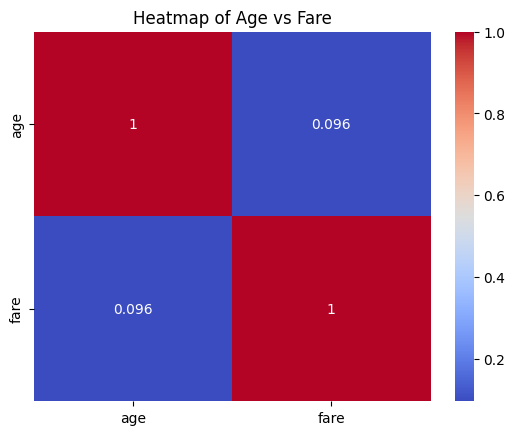

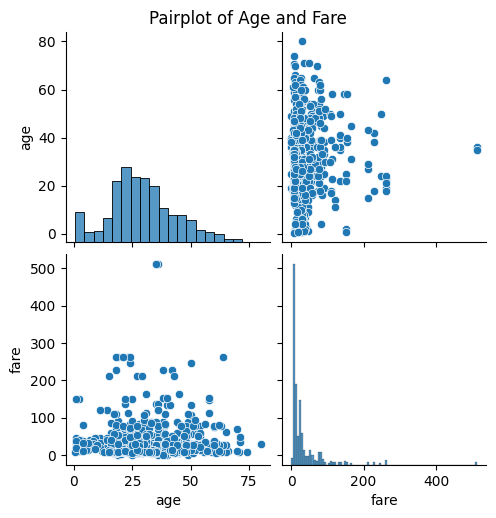

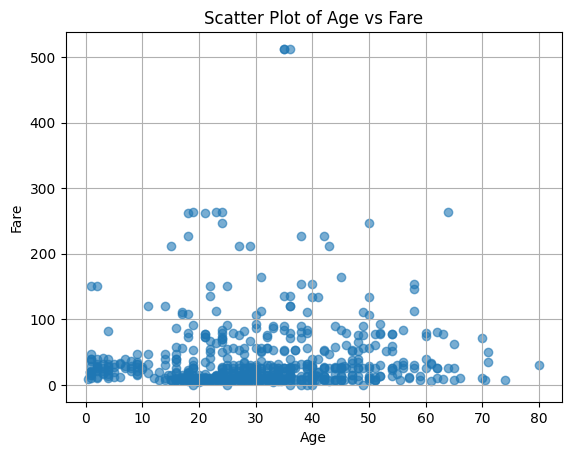

In [ ]:
cor_df = df[['age', 'fare']].dropna()

# Pearson correlation
correlation = cor_df['age'].corr(cor_df['fare'])
print(f"\nPearson Correlation (age vs fare): {correlation:.4f}")

# Heatmap
sns.heatmap(cor_df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Age vs Fare')
plt.show()

# Pairplot
sns.pairplot(cor_df)
plt.suptitle("Pairplot of Age and Fare", y=1.02)
plt.show()

# Scatter plot
plt.scatter(cor_df['age'], cor_df['fare'], alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter Plot of Age vs Fare')
plt.grid(True)
plt.show()

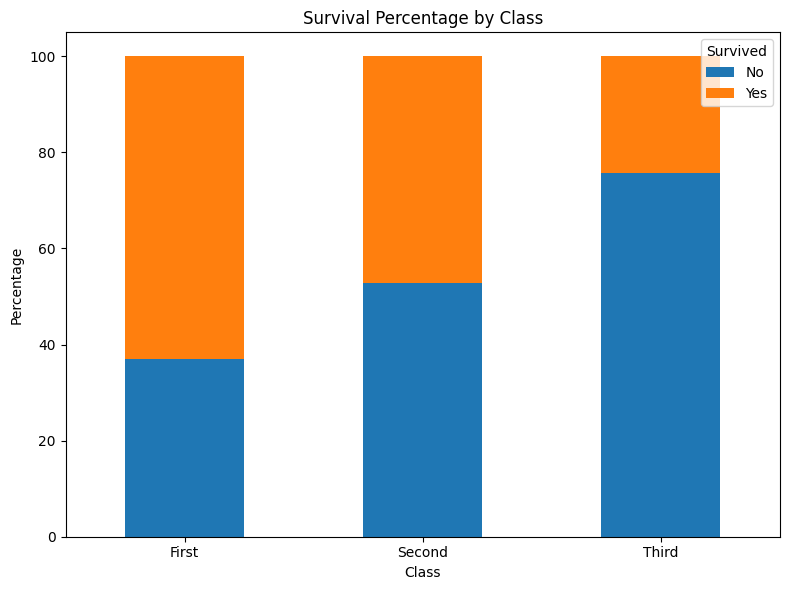


Survival Rate by Class:
class
First     0.629630
Second    0.472826
Third     0.242363
dtype: float64

The class with the highest survival rate is 'First' with a survival rate of 0.63


In [ ]:
# Create a contingency table of 'class' and 'survived'
class_survival_counts = pd.crosstab(df['class'], df['survived'])

# Calculate the percentage of survival within each class for the stacked bar chart
class_survival_percentage = class_survival_counts.div(class_survival_counts.sum(axis=1), axis=0) * 100

# Create the stacked bar chart
class_survival_percentage.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Survival Percentage by Class')
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

# Calculate survival rate for each class
survival_rate_by_class = class_survival_counts[1] / class_survival_counts.sum(axis=1)

print("\nSurvival Rate by Class:")
print(survival_rate_by_class)

# Determine the class with the highest survival rate
highest_survival_class = survival_rate_by_class.idxmax()
highest_survival_rate = survival_rate_by_class.max()

print(f"\nThe class with the highest survival rate is '{highest_survival_class}' with a survival rate of {highest_survival_rate:.2f}")

## Summary:

### Q&A

*   Which class had the highest survival rate on the Titanic?
    The First class had the highest survival rate with a survival rate of 0.63.

### Data Analysis Key Findings

*   The majority of passengers were in the Third class (55.11%), followed by the First (24.24%) and Second (20.65%) classes.
*   A significant difference in survival rates was observed between sexes, with females having a much higher number of survivors (233) compared to males (109).
*   The probability of a female surviving was approximately 0.7420, significantly higher than the overall survival rate of 0.3838.
*   The Pearson correlation coefficient between age and fare is 0.0961, indicating a very weak positive linear relationship.
*   Survival rates varied significantly by class: First class (0.63), Second class (0.47), and Third class (0.24).

*   Passenger class and sex were strong indicators of survival probability on the Titanic.
